# Logistic Regression Tutorial
Summarized from Kruschke (2010): Doing Bayesian Data Analysis

There are many situations in which the value to be predicted is dichotomous (instead of metric/continuous). For example, we might want to predict whether a patient is cured or not (a dichotomous outcome), on the basis of the dosage of drug administered and age of the patient (two metric predictors). What the model does, in this case, is generate a prediction of the probability that a patient is cured, given the specified dosage and age. In other situations, the predictors might be nominal (categorical). For example, we could predict cured versus not-cured onthe basis of type of drug and gender of patient. The model specifies the probability that a patient is cured, given the drug and the gender. 

In our situation, we have a mixture of metric/continuous predictors (GPA, GRE) and nominal/categorical predictors (prestige) predicting a single dichtomous variable (admission: yes or no). If we were to plot this then, the x-axis might show range of values along the scale of GPA scores (1.0 - 4.0), GRE scores (200 - 800), or prestige (1 -4). The y-axis will only show [0,1] and all points will fall along these two values with no-inbetweens (there is no such thing has a half-admission!).

The formal framework for this situation makes use of the logistic function. The logistic function is used to squash a whole range of data to a value in the range of {0,1}. Formally, the logistic function is defined as:

logistic(x) = 1/(1+e^-x)

The logistic function also has the nice property of producing an S-shaped curve (or a sigmoid). Sigmoid curves are akin to titration curves from chemistry. In that sense, it fits a smoothed transition curve from the 0s in the data (e.g. no admission) to the 1s in the data (e.g. yes admission).

But you may be asking yourself: "Hold on, Sam, you just said the logistic function produces values between 0 and 1. How do we arrive at values that are either 0 or 1!?" Great question, Katie. 

In our model, we have something called a "linking function", which is what will transform our data to 0s and 1s. Written out explicitly, what we have is:

mu = sig(x) = logistic(x) = 1/(1+e^-x)
y ~ bern(mu)

Here, the "~" denotes a linking function. "bern" stands for the Bernoulli distribution. (Hang in there I promise this will make sense!) The Bernoulli distribution models the probability of observing a success (i.e. 1, yes admission) vs. a failure (i.e. 0, no admission) given a one-shot observation. In other words, bern(0.50) is like saying we are 50%/50% likely of observing a heads/tails for a single coin flip of a fair coin. bern(0.60) would be like a 60%/40% likely of observing a heads/tails for a single coin flip of a biased coin. So too our variable, mu, calculated from passing our variables, x, through the logistic tells us the likelihood of observing a success (yes admission) or failure (no admission).

But wait! There's more! 

We can be very flexible in how we define 'x'. Traditionally, the shape of the sigmoid (S-shaped curve) is defined by two parameters. In other words, the 'x' in the equation above is usually presented by two variables:

sig(x; gamma, theta) = 1/(1+e^(-gamma(x-theta))

[It might be useful to draw this out on paper, or refer to page 305 in the Bayesian textbook.]

where gamma, called the gain, corresponds to the slope of a standard linear regression, and where theta, called the threshold, corresponds to (-y-intercept)/(slope) of a standard linear regression. In this way, gamma (gain) has an indirect relationship to slope, or the rate of change between our independent and dependent variable. Moreover, in this way, theta (threshold) has an indirect relationship to the y-intercept; however, in this case, the threshold defines where the 50% mark on the y-axis falls over the x-axis. Put in other words, the gain determines the "steepness" of the S-shaped curve; the threshold determines the "position" of the S-shaped curve. (Don't worry, you'll get to try some examples in a minute to get a feel for this.)

One final point before we move on! To simplify the logistic equation, people often use the logit function. The logit function is just the inverse of the logistic function, and transforms the above equations into the following:

log( mu / 1 - mu ) = b0 + b1x

The right-hand side of this equation should be familiar to you! It is the simple ax + b formula that is standard for simple linear regression and it gives us the easily interpretable y-intercept (b0) and slope (b1). Remember that these have indirect relationships to the threshold and gain, respectively!

## Understanding the Logistic

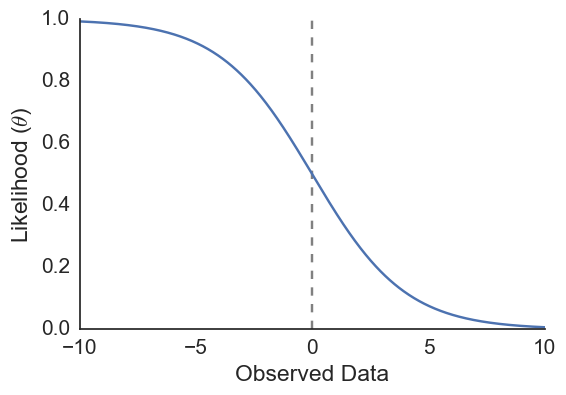

In [1]:
import numpy as np
import pylab as plt
import seaborn as sns 
from ipywidgets import interact
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

def logistic(arr): return 1. / (1 + np.exp(-arr))

b0 = 0
b1 = 0

def visualize_logistic(b0, b1):

    x = np.linspace(-10,10,1000)
    theta = logistic( b0 + b1 * x )
    plt.plot(x,theta)
    if b1: plt.vlines(-b0/b1,0,1,linestyle='--',color='grey')
    plt.xlim(-10,10)
    plt.xlabel('Observed Data')
    plt.ylim(0,1)
    plt.ylabel(r'Likelihood ($\theta$)')
    sns.despine();
    
interact(visualize_logistic, b0=(-5.0,5.0,0.25), b1=(-2.5,2.5,0.25) );

## Simple Logistic Regression

In [ ]:
import numpy as np
import pylab as plt
import seaborn as sns 
from pandas import DataFrame
from statsmodels.api import Logit
from ipywidgets import interact
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

def logistic(arr): return 1. / (1 + np.exp(-arr))

def bernoulli(theta): return np.random.binomial(1,theta)

def logistic_regression(N,b0,b1):

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Simulate data.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    np.random.seed(47404)

    ## Generate independent data (y).
    x = np.linspace(-5,5,N)

    ## Compute likelihood values (theta).
    theta = logistic(b0 + b1 * x)

    ## Generate binary dependent data (y).
    y = bernoulli(theta)

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Fit model to data.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Construct dataframe.
    data = np.array([y,x]).T
    data = DataFrame(data, columns=('y','x'))

    ## Fit logistic regression.
    model = Logit.from_formula('y ~ x', data=data)
    result = model.fit()
    print result.summary2()

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Plot model.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Extract model parameters (b0_hat, b1_hat).
    b0_hat, b1_hat = result.params

    ## Compute estimated likelihood values (theta_hat).
    theta_hat = logistic(b0_hat + b1_hat * x)

    ## Plotting
    plt.plot(x,theta,label='Actual')
    plt.plot(x,theta_hat,label='Estimated')
    for i, c in enumerate(['none','k']): plt.scatter(x[y==i],y[y==i],facecolor=c,edgecolor='k')
    plt.legend(loc='best', frameon=False)
    plt.xlim(-5,5)
    plt.xlabel('Observed Data')
    plt.ylim(-.05,1.05)
    plt.ylabel(r'Likelihood ($\theta$)')
    sns.despine();
    plt.show()
    
interact(logistic_regression, N=(20,200,20), b0=(-2.0,2.0,0.25), b1=(-2.0,2.0,0.25) );

# Logistic Regression Applied

## Logistic Regression for ARC

Optimization terminated successfully.
         Current function value: 0.401705
         Iterations 7


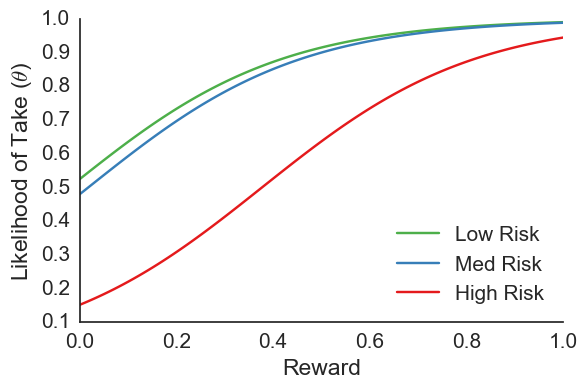

In [33]:
import numpy as np
import pylab as plt
import seaborn as sns 
from pandas import read_csv, get_dummies
from statsmodels.api import Logit
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data_file = '/space/lilli/1/users/DARPA-Behavior/arc/csv/hc001_arc_mri_ser-1'
data = read_csv(data_file)

## Extract variables of interest.
data = data[['ResponseType','RiskType','Reward']]

## Make and append dummy coded risk variables.
data = data.merge(get_dummies(data.RiskType), left_index=True, right_index=True)

## Rename columns (for convenience).
data.columns = ['Choice', 'Risk', 'Reward', 'LowRisk', 'MedRisk', 'HighRisk']

## Include intercept column.
data['Intercept'] = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Perform regression 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Intercept automatically included.
model = Logit.from_formula('Choice ~ MedRisk + HighRisk + Reward', data=data, 
                           subset=data['Choice']!=99)
result = model.fit()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Compute theta and DDB.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
def logistic(arr): return 1. / (1 + np.exp(-arr))

betas = result.params
theta = logistic( np.dot(data[['Intercept','MedRisk','HighRisk','Reward']], betas) )
ddb = 0.25 - (theta - 0.5) ** 2
## Save data here.

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot results.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

labels = ['Low Risk', 'Med Risk', 'High Risk']
colors = ['#4daf4a', '#377eb8', '#e41a1c']
reward = np.linspace(0,1,100)

for i in range(3):
    
    ## Compute thetas for condition.
    if not i: theta_cond = logistic( betas[0] + betas[-1] * reward )
    else: theta_cond = logistic( betas[0] + betas[i] + betas[-1] * reward )
    
    ## Plot.
    plt.plot(reward, theta_cond, color=colors[i], label=labels[i])
    
sns.despine()
plt.xlim(0,1)
plt.xlabel('Reward')
plt.ylim(0,1)
plt.ylabel(r'Likelihood of Take ($\theta$)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Logistic Regression for WAR

Optimization terminated successfully.
         Current function value: 0.560563
         Iterations 5


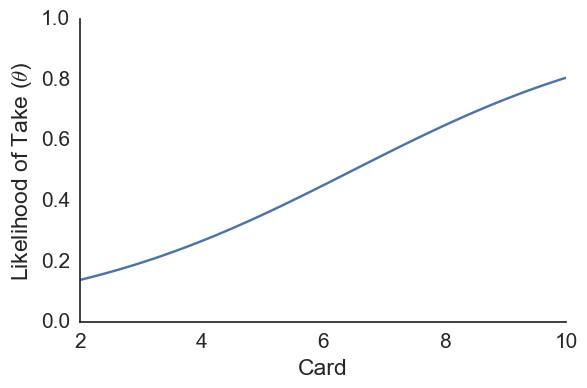

In [48]:
import numpy as np
import pylab as plt
import seaborn as sns 
from pandas import read_csv
from statsmodels.api import Logit
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Load and prepare data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load data.
data_file = '/space/lilli/1/users/DARPA-Behavior/war/csv/hc001_war_mri-1'
data = read_csv(data_file)
data = data[data.Card1 != 0].reset_index(drop=True)

## Extract variables of interest.
data = data[['ResponseType','Card1']]

## Rename columns (for convenience).
data.columns = ['Choice', 'Card']

## Include intercept column.
data['Intercept'] = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Perform regression 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Intercept automatically included.
model = Logit.from_formula('Choice ~ Card', data=data, 
                           subset=data['Choice']!=99)
result = model.fit()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Compute theta and DDB.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
def logistic(arr): return 1. / (1 + np.exp(-arr))

betas = result.params
theta = logistic( np.dot(data[['Intercept','Card']], betas) )
ddb = 0.25 - (theta - 0.5) ** 2
## Save data here.

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot results.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Compute thetas for condition.
cards = np.linspace(2,10,100)
theta_cond = logistic( betas[0] + betas[1] * cards )

## Plot.
plt.plot(cards, theta_cond)
    
sns.despine()
plt.xticks(np.arange(2,11,2))
plt.ylim(2,10)
plt.xlabel('Card')
plt.ylim(0,1)
plt.ylabel(r'Likelihood of Take ($\theta$)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()